In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Import necessary libraries
import pandas as pd        # For data manipulation and analysis
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns      # For advanced data visualization
from wordcloud import WordCloud  # For generating word clouds

In [13]:
# Load the dataset
file_path = "C:/Users/subro/Downloads/Cap 1 Zomato EDA-20240730T150203Z-001/Cap 1 Zomato EDA/Indian-Resturants.csv"
df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

In [4]:
# Display basic information about the dataset
print(df.info())  # Outputs the structure, non-null counts, and data types of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [5]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [6]:
# Display the first few rows of the dataset
df.head() # Shows the first 5 rows to get an initial understanding of the data

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [7]:
df.tail()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


In [8]:
print(df)

          res_id                            name      establishment  \
0        3400299                     Bikanervala    ['Quick Bites']   
1        3400005  Mama Chicken Mama Franky House    ['Quick Bites']   
2        3401013                   Bhagat Halwai    ['Quick Bites']   
3        3400290                   Bhagat Halwai    ['Quick Bites']   
4        3401744     The Salt Cafe Kitchen & Bar  ['Casual Dining']   
...          ...                             ...                ...   
211939   3202251  Kali Mirch Cafe And Restaurant  ['Casual Dining']   
211940   3200996                      Raju Omlet    ['Quick Bites']   
211941  18984164                The Grand Thakar  ['Casual Dining']   
211942   3201138                          Subway    ['Quick Bites']   
211943  18879846     Freshco's - The Health Cafe           ['Café']   

                                                      url  \
0       https://www.zomato.com/agra/bikanervala-khanda...   
1       https://www.zomat

In [9]:
# Exploratory Data Analysis (EDA)
# Checking for missing values
print(df.isnull().sum())  # Summarizes the count of missing values in each column

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64


In [14]:
common_cuisine_junagadh = df[df['city'] == 'Junagadh']['cuisines'].mode()[0]

In [15]:
common_cuisine_junagadh

'Fast Food'

In [10]:
# Handling missing values (e.g., dropping rows with missing values)
df = df.dropna()  # Drop rows with any missing values

In [11]:
# Checking for duplicates
print(df.duplicated().sum())  # Checks the number of duplicate rows

35916


In [12]:
# Removing duplicates if any
df = df.drop_duplicates()  # Removes duplicate rows from the dataset

In [13]:
# Understanding the basic statistics of the data
print(df.describe())  # Outputs summary statistics of numerical columns

             res_id       city_id      latitude     longitude  country_id  \
count  1.246200e+04  12462.000000  12462.000000  12462.000000     12462.0   
mean   8.712610e+06   1298.689857     22.135551     77.311470         1.0   
std    8.965373e+06   3587.801263     89.602949      5.433744         0.0   
min    5.000000e+01      1.000000      0.000000      0.000000         1.0   
25%    6.609925e+04      4.000000     17.421147     73.859695         1.0   
50%    3.100026e+06      8.000000     21.260515     77.112436         1.0   
75%    1.867036e+07     23.000000     26.855560     79.937643         1.0   
max    1.915215e+07  11354.000000  10000.000000     91.811354         1.0   

       average_cost_for_two   price_range  aggregate_rating         votes  \
count          12462.000000  12462.000000      12462.000000  12462.000000   
mean             806.759348      2.066522          3.763240    580.201172   
std              835.917388      0.981485          0.752292   1137.857486  

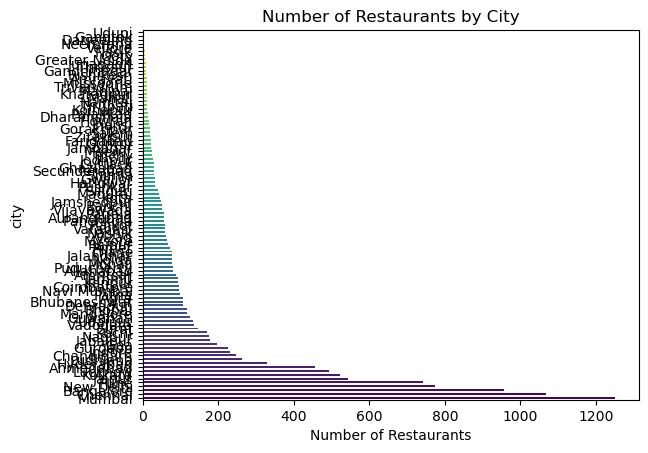

In [11]:
# Plotting horizontal bar charts (multicolor)
# For example, plotting the number of restaurants per city
city_counts = df['city'].value_counts()  # Counts the number of restaurants per city
city_counts.plot(kind='barh', color=sns.color_palette("viridis", len(city_counts)))  # Plots horizontal bar chart
plt.title('Number of Restaurants by City')  # Sets the title of the plot
plt.xlabel('Number of Restaurants')  # Labels the x-axis
plt.show()  # Displays the plot

In [16]:
# Adjusting the figure size for better visibility
plt.figure(figsize=(10, 8))  # Set the width and height of the figure

# Counting the number of restaurants per city
city_counts = df['city'].value_counts()  # Adjust column name if necessary

# Plotting the top cities with the most restaurants
top_cities = city_counts.head(20)  # Display only the top 20 cities for clarity
top_cities.plot(kind='barh', color=sns.color_palette("viridis", len(top_cities)))

# Adding titles and labels
plt.title('Number of Restaurants by City', fontsize=16)  # Set the title with a larger font size
plt.xlabel('Number of Restaurants', fontsize=14)  # Label the x-axis with a larger font size
plt.ylabel('city', fontsize=14)  # Label the y-axis with a larger font size
plt.xticks(fontsize=12)  # Set the font size for the x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for the y-axis ticks

# Display the plot
plt.show()

SyntaxError: '(' was never closed (4142837637.py, line 9)

In [16]:
print(df.columns)  # Displays the exact column names in the DataFrame

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway'],
      dtype='object')


In [18]:
# Grouping data and applying functions
# Example: Average rating per city
# Grouping data by 'city' and calculating the mean 'aggregate_rating'
city_avg_rating = df.groupby('city')['aggregate_rating'].mean()

# Printing the sorted average ratings
print(city_avg_rating.sort_values(ascending=False))

city
Gurgaon         4.020796
Secunderabad    3.973333
New Delhi       3.968903
Mumbai          3.953078
Bangalore       3.950209
                  ...   
Manali          2.272727
Thrissur        2.175000
Ooty            1.980000
Darjeeling      1.800000
Pushkar         1.293939
Name: aggregate_rating, Length: 96, dtype: float64


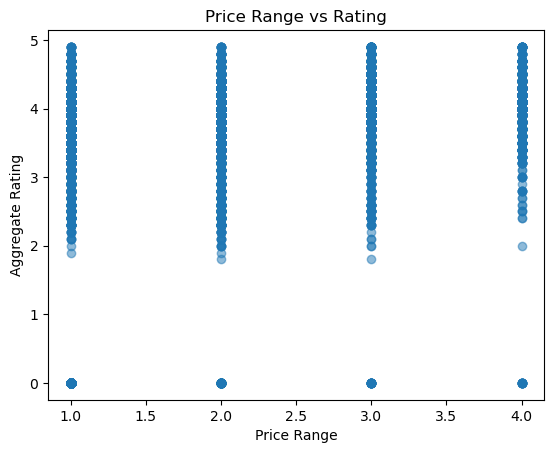

In [19]:
# Scatter plot: Price range vs Rating
plt.scatter(df['price_range'], df['aggregate_rating'], alpha=0.5)  # Plots a scatter plot with some transparency
plt.title('Price Range vs Rating')  # Sets the title of the plot
plt.xlabel('Price Range')  # Labels the x-axis
plt.ylabel('Aggregate Rating')  # Labels the y-axis
plt.show()  # Displays the plot

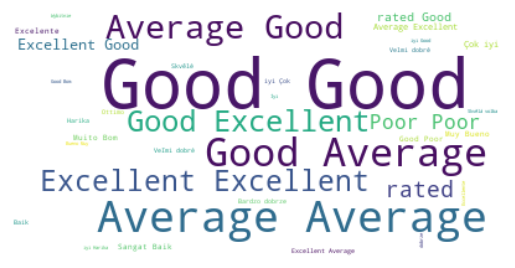

In [14]:
# # Word Cloud for Reviews
# # Assuming there's a 'Reviews' column containing text reviews
# reviews_text = " ".join(review for review in df['Reviews'])  # Combines all reviews into a single string
# wordcloud = WordCloud(background_color="white").generate(reviews_text)  # Generates a word cloud
# plt.imshow(wordcloud, interpolation='bilinear')  # Displays the word cloud image
# plt.axis('off')  # Hides the axes
# plt.show()  # Displays the word cloud


# Example: Using the 'highlights' column for generating the word cloud
text_data = " ".join(item for item in df['rating_text'].dropna())  # Combines all highlights into a single string

# Generate the word cloud
wordcloud = WordCloud(background_color="white").generate(text_data)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hides the axes
plt.show()

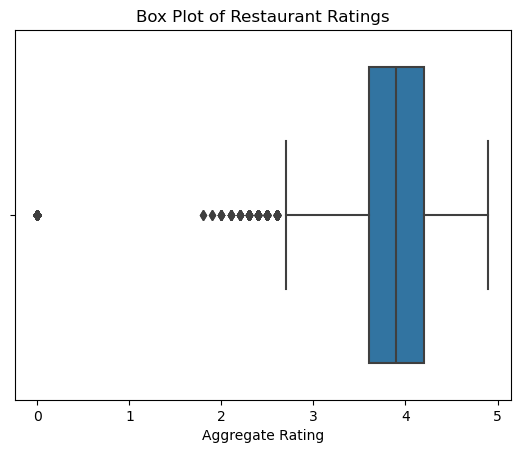

In [22]:
# Box plot for visualizing the spread of 'aggregate_rating'
# This plot helps to understand the distribution and outliers in the restaurant ratings.

sns.boxplot(x='aggregate_rating', data=df)  # Creates a box plot for the 'aggregate_rating' column

plt.title('Box Plot of Restaurant Ratings')  # Sets the title of the plot for clarity
plt.xlabel('Aggregate Rating')  # Labels the x-axis to indicate what the box plot represents

plt.show()  # Displays the plot to visualize the data distribution

C:\Users\SkillCircle\AppData\Local\Temp\ipykernel_6932\1481283397.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['aggregate_rating'], shade=True)  # Creates a density plot (KDE plot) with shading
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


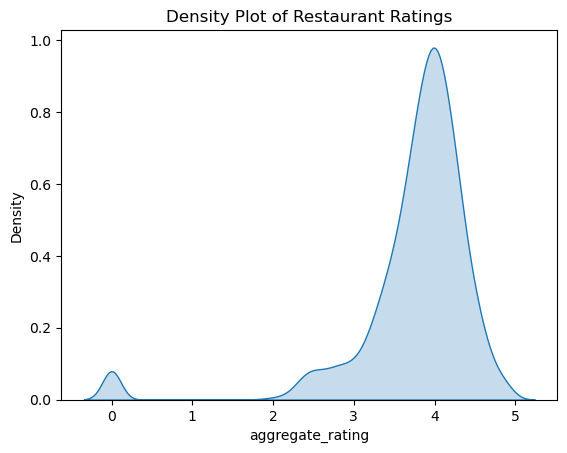

In [23]:
# Density plot for the distribution of ratings
sns.kdeplot(df['aggregate_rating'], shade=True)  # Creates a density plot (KDE plot) with shading
plt.title('Density Plot of Restaurant Ratings')  # Sets the title of the plot
plt.show()  # Displays the plot

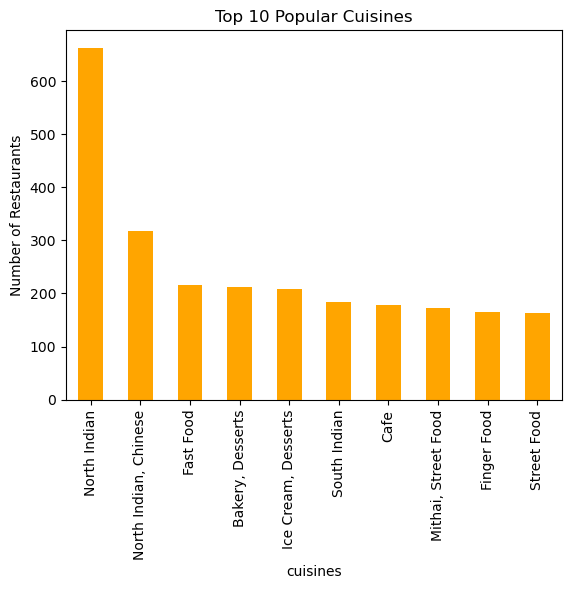

In [25]:
# Bar chart for popular cuisines
cuisine_counts = df['cuisines'].value_counts().head(10)  # Counts the top 10 most frequent cuisines
cuisine_counts.plot(kind='bar', color='orange')  # Plots a bar chart
plt.title('Top 10 Popular Cuisines')  # Sets the title of the plot
plt.xlabel('cuisines')  # Labels the x-axis
plt.ylabel('Number of Restaurants')  # Labels the y-axis
plt.show()  # Displays the plot

In [26]:
# Drawing insights and conclusions from the data
# Example: Summary of key findings
print("Key Findings:")
print("1. City with the highest concentration of restaurants:", city_counts.idxmax())
print("2. Average rating by city:\n", city_avg_rating)
print("3. Popular cuisines include:\n", cuisine_counts.index.tolist())

Key Findings:
1. City with the highest concentration of restaurants: Mumbai
2. Average rating by city:
 city
Agra          3.847170
Ahmedabad     3.794298
Ajmer         3.444444
Allahabad     3.358750
Amravati      3.450000
                ...   
Varanasi      3.681667
Vellore       3.350000
Vijayawada    3.366667
Vizag         3.588710
Zirakpur      3.450000
Name: aggregate_rating, Length: 96, dtype: float64
3. Popular cuisines include:
 ['North Indian', 'North Indian, Chinese', 'Fast Food', 'Bakery, Desserts', 'Ice Cream, Desserts', 'South Indian', 'Cafe', 'Mithai, Street Food', 'Finger Food', 'Street Food']
